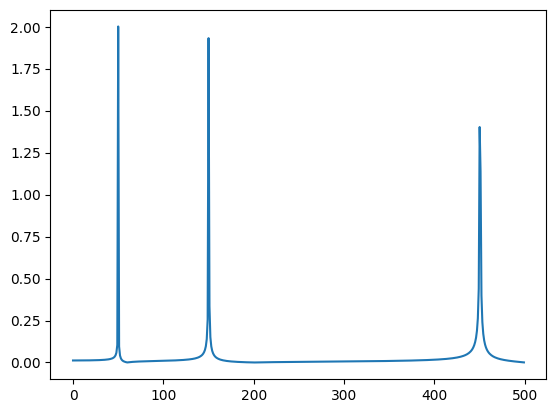

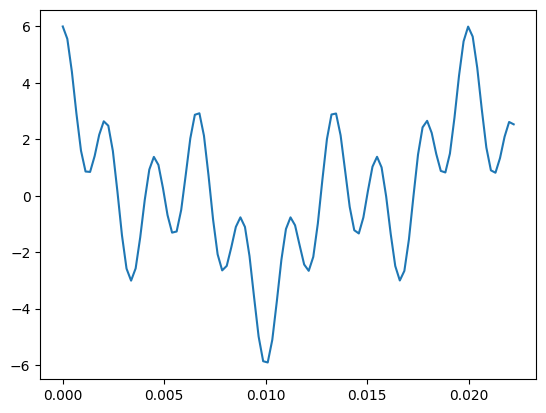

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def my_cos(x, f=100, A=2.0):
    return A * np.cos(x * f * 2.0 * np.pi)

def func(x):
    return my_cos(x, 50) + my_cos(x, 150) + my_cos(x, 450)


def draw_spectr(func, sampling_rate=1000, duration=1):

    x = np.linspace(0, duration, sampling_rate * duration)
    y = func(x)
    y_fft = 2 * np.fft.fft(y) / len(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)
    plt.plot(freq[:len(freq) // 2], np.abs(y_fft)[:len(freq) // 2])

    return freq


sampling_rate = 1000
duration = 1
draw_spectr(func, sampling_rate, duration)
plt.show()

x = np.linspace(0, 10 / 450, 100) 
y = func(x)
plt.plot(x, y)
plt.show()

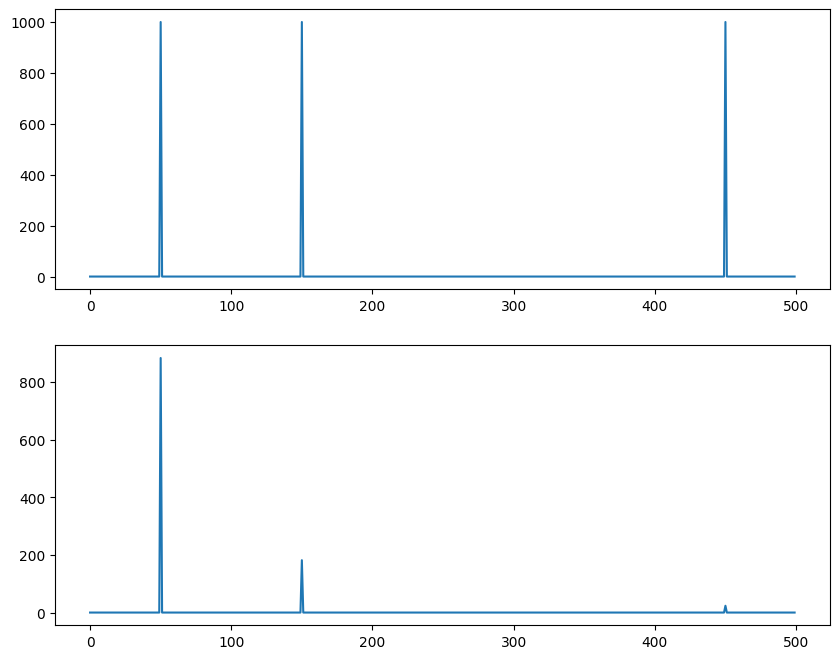

In [ ]:
def filter_lf(y, sampling_rate, w_c):

    y_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)

    H = w_c ** 2 / (- freq ** 2 + 1j * np.sqrt(2) * w_c * freq + 1)

    filtered_signal_fft = y_fft * H
    filtered_signal = np.fft.ifft(filtered_signal_fft)

    return filtered_signal, filtered_signal_fft, freq

x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x)

filtered_signal, filtered_signal_fft, freq = filter_lf(y, sampling_rate, 70)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])



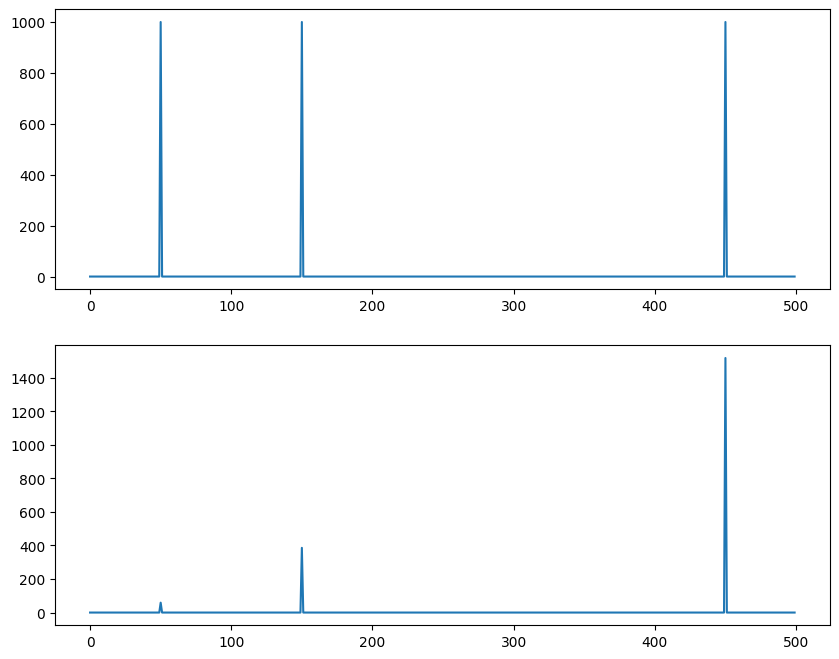

In [ ]:
def filter_hf(y, sampling_rate, w_c):

    y_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)

    H = freq ** 2 / (- w_c ** 2 + 1j * np.sqrt(2) * w_c * freq + 1)

    filtered_signal_fft = y_fft * H
    filtered_signal = np.fft.ifft(filtered_signal_fft)

    return filtered_signal, filtered_signal_fft, freq

x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x)

filtered_signal, filtered_signal_fft, freq = filter_hf(y, sampling_rate, 200)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])

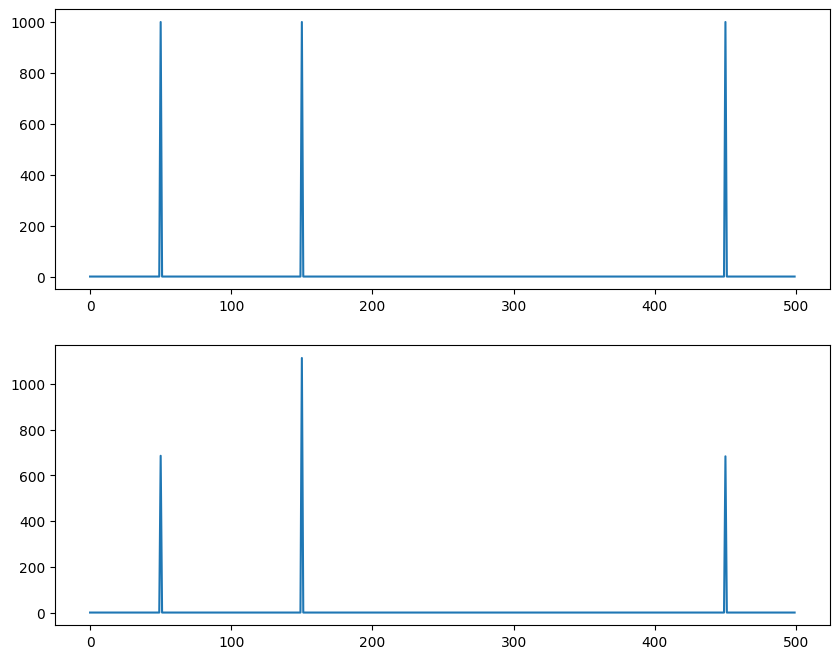

In [ ]:
def band_filter(y, sampling_rate, w_c1, w_c2):
    y_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)

    H1 = freq ** 2 / (- w_c2 ** 2 + 1j * np.sqrt(2) * w_c2 * freq + 1)
    H2 = w_c1 ** 2 / (- freq ** 2 + 1j * np.sqrt(2) * w_c1 * freq + 1)

    filtered_signal_fft = y_fft * H1 * H2 * 4
    filtered_signal = np.fft.ifft(filtered_signal_fft)

    return filtered_signal, filtered_signal_fft, freq

x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x)

filtered_signal, filtered_signal_fft, freq = band_filter(y, sampling_rate, 140, 160)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])

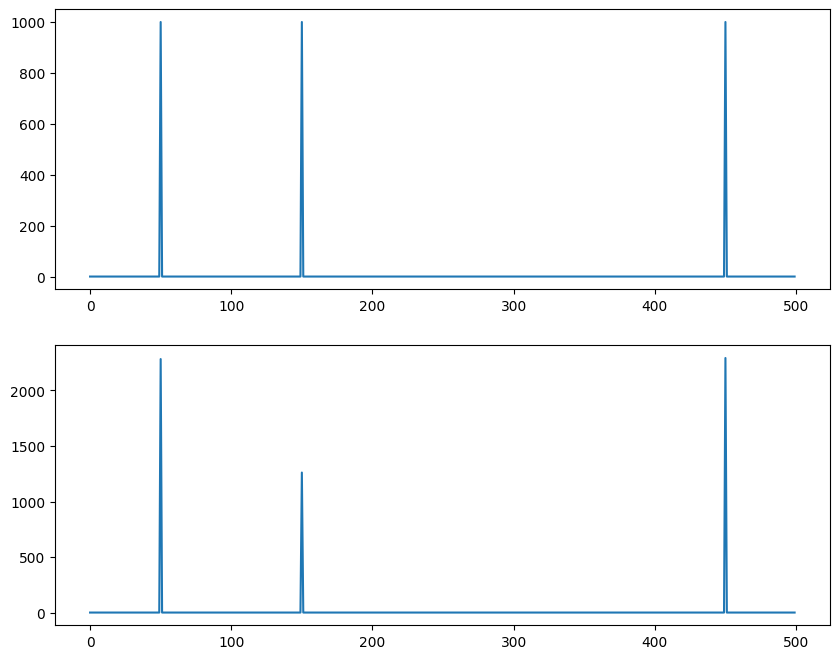

In [ ]:
def block_filter(y, sampling_rate, w_c1, w_c2):
    y_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)

    H1 = freq ** 2 / (- w_c1 ** 2 + 1j * np.sqrt(2) * w_c1 * freq + 1)
    H2 = w_c2 ** 2 / (- freq ** 2 + 1j * np.sqrt(2) * w_c2 * freq + 1)

    filtered_signal_fft = y_fft * (H1 + H2)
    filtered_signal = np.fft.ifft(filtered_signal_fft)

    return filtered_signal, filtered_signal_fft, freq

x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x)

filtered_signal, filtered_signal_fft, freq = block_filter(y, sampling_rate, 140, 160)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])

/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


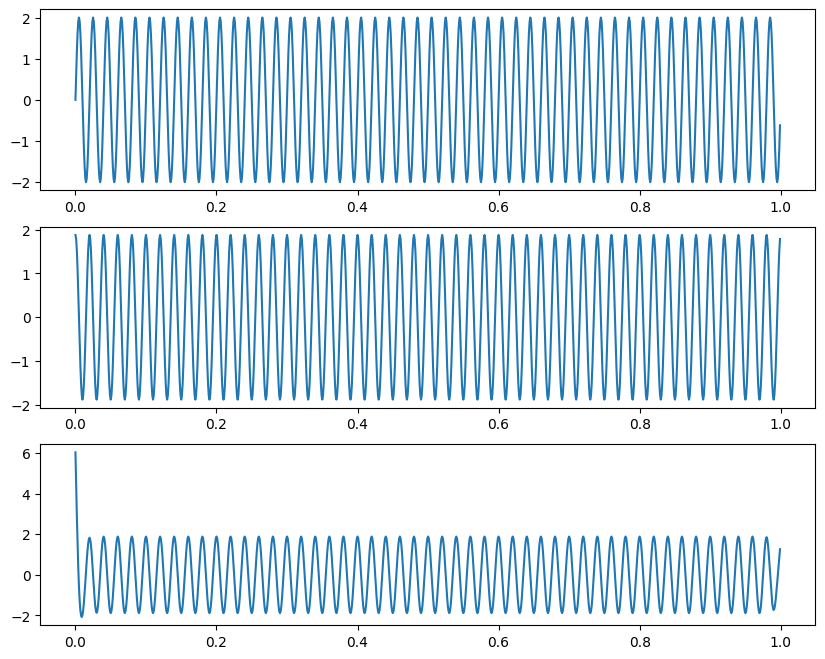

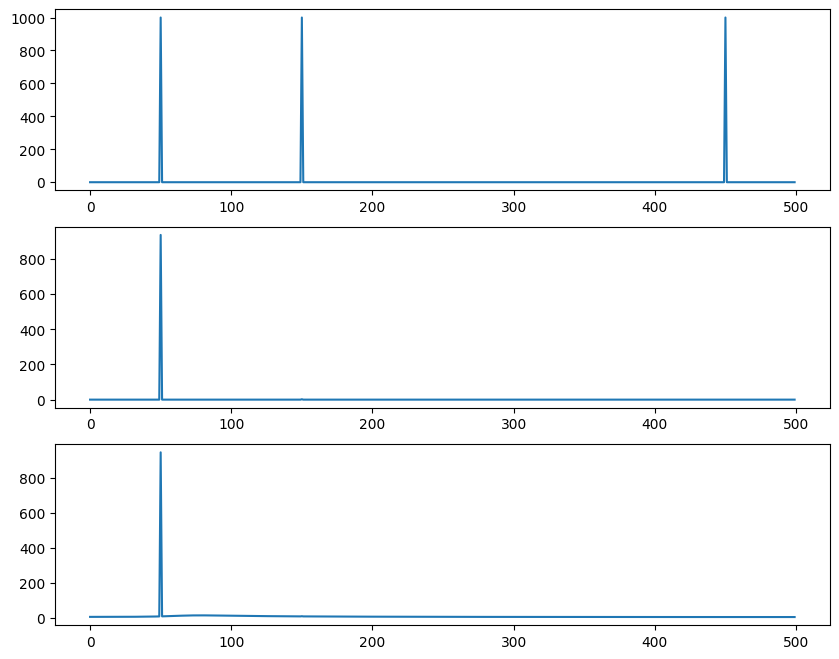

In [6]:
from scipy.signal import butter, filtfilt

def filter_lf_order(y, sampling_rate, w_c, order):

    y_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 1 / sampling_rate)

    S = freq / w_c
    H = 1 / (1 + (-1)**order * S ** (2 * order))

    filtered_signal_fft = y_fft * H
    filtered_signal = np.fft.ifft(filtered_signal_fft)

    return filtered_signal, filtered_signal_fft, freq

x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x)

filtered_signal, filtered_signal_fft, freq = filter_lf_order(y, sampling_rate, 70, 4)

w_c = 70
w_c_n = 2 * w_c / (sampling_rate)
b, a = butter(4, w_c_n, btype='low', analog=False)
filtered_signal_l = filtfilt(b, a, y)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 3)
plt.plot(x, filtered_signal_l)

plt.subplot(3, 1, 2)
plt.plot(x, filtered_signal)

plt.subplot(3, 1, 1)
plt.plot(x, 2 * np.sin(2 * np.pi * x * 50))

plt.show()

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(3, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])

plt.subplot(3, 1, 3)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(filtered_signal_l))[:len(freq) // 2])

plt.show()

In [7]:
def butterworth_poles(n, wc):

    poles = []
    for k in range(n):
        angle = np.pi * (2*k + 1) / (2*n)
        pole = wc * np.exp(1j * (np.pi/2 + angle))
        poles.append(pole)
    
    return np.array(poles)

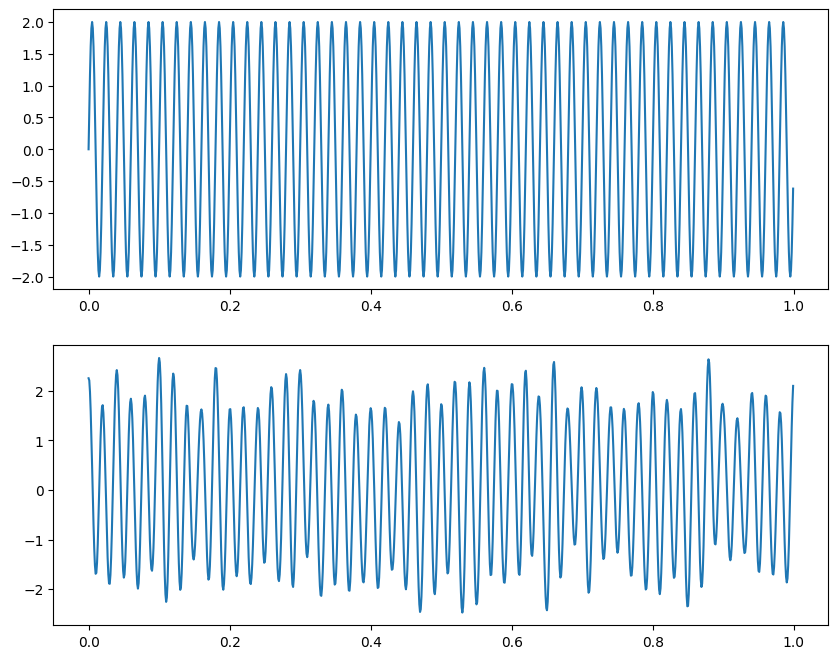

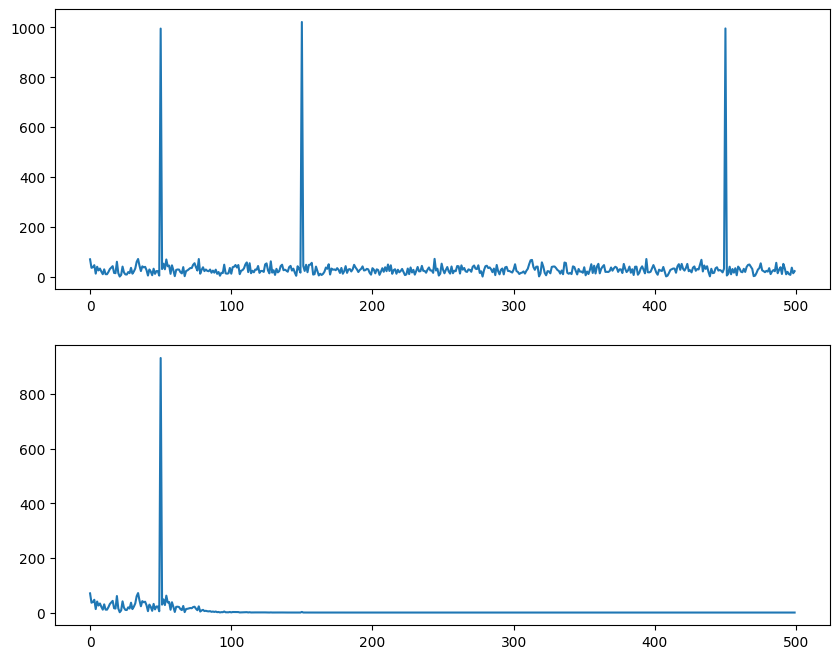

In [8]:
x = np.linspace(0, duration, sampling_rate * duration, endpoint=False)
y = func(x) + np.random.normal(0, 1, len(x))

filtered_signal, filtered_signal_fft, freq = filter_lf_order(y, sampling_rate, 70, 4)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(x, filtered_signal)

plt.subplot(2, 1, 1)
plt.plot(x, 2 * np.sin(2 * np.pi * x * 50))

plt.show()

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq) // 2], np.abs(filtered_signal_fft)[:len(freq) // 2])

plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq) // 2], np.abs(np.fft.fft(y))[:len(freq) // 2])

plt.show()